# Statistical Distribution Modelling: DALL-E-3/API

In [1]:
import sys
sys.path.append('../')

from db import *
from analysis import *

In [3]:
data = (
    session.query(
        # ImageCreationRequest
        ImageCreationRequest.response_time,
    ).join(
        Images,
        Images.id == ImageCreationRequest.image_id,
    ).filter(
        ImageCreationRequest.model == 'dalle-3',
        ImageCreationRequest.success == True,
        ImageCreationRequest.timing_valid == True,
        Images.from_b64 == True,
    )
)
df = query_to_df(data)
print(len(df))

581


# Plot

ks_stat=array([0.0446872]), p_value=array([0.1904992])


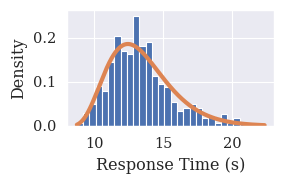

In [ ]:
import scipy.stats as stats
import numpy as np

response_time = df
# Generate a range of values for plotting the distributions
x = np.linspace(response_time.min(), response_time.max(), 1000)

# fit params
gamma_params = stats.gamma.fit(response_time)

# test fit
ks_stat, p_value = stats.kstest(response_time, 'gamma', gamma_params)
print(f'{ks_stat=}, {p_value=}')

# Log-Normal distribution
gamma_pdf = stats.gamma.pdf(x, *gamma_params)

df.plot.hist(bins=30, figsize=(3,2), density=True, legend=False)
plt.xlabel("Response Time (s)")
plt.ylabel("Density")
plt.tight_layout()

# Overlay the fitted Log-Normal distribution
plt.plot(x, gamma_pdf, lw=3)